# Reconocimiento de patrones: Identificación de grupos o Clustering
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clustering%20III.ipynb)

## Técnicas de clustering: *K-Means*

La técnica de *k-medias* (o *k-means*) es una de las técnicas de clustering más simples y más utilizadas. Es una técnica de *aprendizaje no supervisado*: la técnica debe clasificar objetos desconocidos a un conjunto de clases de las que apenas se conocen algunos parámetros y no las características de cada clase. En el caso de *k*-medias, lo único que se conoce es el número de grupos.

El objetivo del algoritmo de *k*-medias es particionar un conjunto de *n* datos ejemplo en *k* grupos, asociando objetos cercanos y distinguiendo objetos diferentes. El resultado al final del procedimiento es la generación de un "*prototipo de clase*".

En la imagen a continuación, se presentan 30 datos (puntos azules) que han sido agrupados en 4 clusters. Las líneas rojas representan fronteras (posibles) entre clase y las estrellas rojas representan prototipos de clase.

![ ](images/k-means0.png)

La clase es una generalización del cluster; una descripción conceptual del grupo representado por el conjunto de datos. La delimitación de una clase, construida de forma inductiva (a partir de ejemplos), suele no ser precisa: está limitada a los datos de que disponemos para modelarla, como se ilustra en la imagen siguiente. 

![ ](images/cluster-class.png)

En esta imagen, los datos (ficticios) conocidos nos han permitido generar un modelo de clase (area en azul). Sin embargo, la clase real es diferente, sólo que al crear la clase no conocíamos suficientes datos para modelarla fielmente (como los datos señalados como puntos rojos). Considérese, por ejemplo, el siguiente conjunto de bicicletas:

![ ](images/bicycles.png)

A partir de los datos disponibles podemos concluir, por ejemplo, que todas las bicicletas tienen un asiento y pedales... sin embargo, esta definción de la clase bicicleta no incluye los siguientes ejemplares:

[![ ](images/bicycles-2.png)](https://www.youtube.com/watch?v=KewMZ8sM0Uo)


### Algoritmo

El algoritmo k-means sigue los siguientes pasos (dado un conjunto de datos):

In [1]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
import math
import random
import time
import os
import sys
from scipy.spatial import distance
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1

os.chdir('Data sets')
LARGER_DISTANCE = sys.maxsize
TALK = True # TALK = True, imprime resultados parciales

In [2]:
# Leer los datos de archivo
DATA_SET = pd.read_csv("datosProm.csv", names = ['A', 'B']).values
DATA_LEN = len(DATA_SET)

# Definir una clase para expresar puntos y su asignación a un cluster
class DataPoint:
    def __init__(self, p):
        self.value = p[:]
        
    def set_value(self, p):
        self.value = p
    
    def get_value(self):
        return self.value
    
    def set_cluster(self, cluster):
        self.cluster = cluster
    
    def get_cluster(self):
        return self.cluster

data = []
def initialize_dataset():
    for i in range(DATA_LEN):
        point = DataPoint(DATA_SET[i])
        point.set_cluster(None)
        data.append(point)
    return

# --------------------------
# Crear el conjunto de datos
initialize_dataset()

1) Definir el valor de $k$

In [3]:
NUM_CLUSTERS = 3

2) Seleccionar de manera arbitraria *k* puntos en el espacio de características como centros iniciales de  los clusters (centroides o centros de masa).
![ ](images/k-means1.png)

In [4]:
# Definir forma de muestreo; 0 = random, 1=head, 2=tail
SAMPLING_METHOD = 1 

centroids = []
def initialize_centroids():
    if (TALK) : 
        print("Centroides inicializados en:")
    for c in range(NUM_CLUSTERS):
        if (SAMPLING_METHOD == 0) :
            which = random.randint(0,DATA_LEN-1)
        elif (SAMPLING_METHOD == 1):
            which = c
        else :
            which = DATA_LEN-1 - c
                
        centroids.append(list(DATA_SET[which]))
        if (TALK) : 
            print(centroids[c])        
    if (TALK) : 
        print()
    
    return

# --------------------------
# Inicializar los centroides
initialize_centroids()

Centroides inicializados en:
[70.280000000000001, 42.125]
[0.0, 56.75]
[79.0, 2.5]



3) Asignar cada punto del conjunto de datos al cluster donde la distancia del punto al centroide es menor.
![ ](images/k-means2.png)

In [5]:
def update_clusters():
    changed = False
    
    for i in range(DATA_LEN):
        minDistance = LARGER_DISTANCE
        currentCluster = 0
        
        for j in range(NUM_CLUSTERS):
            dist = distance.euclidean(data[i].get_value(), centroids[j])
            if(dist < minDistance):
                minDistance = dist
                currentCluster = j
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            changed = True
            
    members = [0] * NUM_CLUSTERS
    for i in range(DATA_LEN):
        members[data[i].get_cluster()] += 1
    
    if (TALK) : 
        for j in range(NUM_CLUSTERS):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
            
    return changed

# --------------------------
# Actualizar los clusters
KEEP_WALKING = update_clusters()

El cluster  0  incluye  18 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  5 miembros.



4) Calcular los centroides a partir de los puntos en cada cluster. 
![ ](images/k-means3.png)

In [6]:
def update_centroids():    
    if (TALK) : 
        print("Los nuevos centroids son:")
    for j in range(NUM_CLUSTERS):
        means = [0] * DATA_SET.shape[1]
            
        clusterSize = 0
        for k in range(len(data)):
            if(data[k].get_cluster() == j):
                p = data[k].get_value()
                for i in range(DATA_SET.shape[1]):
                    means[i] += p[i]
                clusterSize += 1

        if(clusterSize > 0):
            for i in range(DATA_SET.shape[1]):
                centroids[j][i] = means[i] / clusterSize

        if (TALK) : 
            print(centroids[j])        
    if (TALK) : 
        print()
    
    return

# --------------------------
# Actualizar los centroides
update_centroids()

Los nuevos centroids son:
[80.957777777777778, 73.79605555555554]
[0.0, 73.886571428571415]
[84.009999999999991, 6.466800000000001]



5) Repetir los pasos 2 y 3 hasta que no haya cambios en los clusters.
![ ](images/k-means4.png)

In [7]:
while(KEEP_WALKING):
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        if (TALK) : 
            print ("No más cambios.")    

El cluster  0  incluye  17 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  6 miembros.

Los nuevos centroids son:
[81.555294117647065, 76.078176470588218]
[0.0, 73.886571428571415]
[81.808333333333323, 11.222333333333333]

El cluster  0  incluye  16 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  7 miembros.

Los nuevos centroids son:
[82.259999999999991, 78.200249999999983]
[0.0, 73.886571428571415]
[80.161428571428573, 15.637]

El cluster  0  incluye  16 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  7 miembros.

No más cambios.


<hr style="border-width: 1px;">

El método $k$-means es un método muy robusto (aunque diversos autores han buscado maneras de eficientarlo, ver por ejemplo [este artículo](http://worldcomp-proceedings.com/proc/p2015/CSC2667.pdf) o [este otro](http://academics.smcvt.edu/jtrono/Papers/SMCClusteringPaper_DavidKronenberg.pdf). Su principal restricción es la selección adecuada del número de clusters, $k$. En casos más interesantes que nuestro ejemplo, conviene realizar un análisis previo de determinación de clusters, por dendrogramas, por ejemplo.

En el caso de los datos del *Pima Indian Diabetes Data Set*, por ejemplo, el análisis por dendrogramas ha arrojado:

              emb        gl2h         pad         ept        is2h         imc  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean     3.295165  122.315522   70.671756   29.122137  155.717557   33.072519   
std      3.209425   31.435992   12.481277   10.513128  118.879630    7.023947   
min      0.000000    0.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.000000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.000000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

              fpd        edad       class  
count  393.000000  393.000000  393.000000  
mean     0.522476   30.839695    0.330789  
std      0.345232   10.199903    0.471097  
min      0.085000   21.000000    0.000000  
25%      0.270000   23.000000    0.000000  
50%   

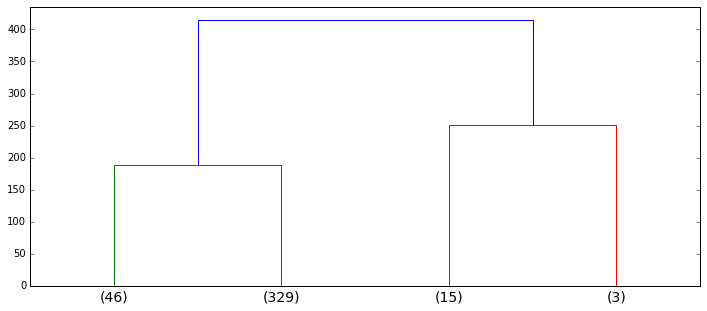

In [8]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

df = pd.read_csv("Pima Indian Data Set/pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
df.loc[df['pad'] == 0,'pad'] = np.nan
df.loc[df['ept'] == 0,'ept'] = np.nan
df.loc[df['is2h'] == 0,'is2h'] = np.nan
df.loc[df['imc'] == 0,'imc'] = np.nan
df = df.dropna()
print(df.describe())

Z = linkage(df, 'centroid')
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=4, show_leaf_counts=True, leaf_font_size=14.)
plt.show()

Nótese que en este caso hemos desechado los datos incompletos.

Podemos tomar este dendrograma y probar suerte con $k=4$:

In [9]:
NUM_CLUSTERS = 4
TALK = False
DATA_SET = df.values
DATA_LEN = len(DATA_SET)
SAMPLING_METHOD = 0 

data = []
initialize_dataset()
centroids = []
initialize_centroids()

KEEP_WALKING = True
while(KEEP_WALKING):
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        members = [0] * NUM_CLUSTERS
        for i in range(DATA_LEN):
            members[data[i].get_cluster()] += 1

        for j in range(NUM_CLUSTERS):
            print("\nCluster {}: {} miembros.".format(j, members[j]))
            print(np.asarray(centroids[j]))        


Cluster 0: 52 miembros.
[   4.25  149.62   74.04   30.87  291.48   35.58    0.56   33.9     0.5 ]

Cluster 1: 143 miembros.
[   3.89  133.31   71.69   30.71  160.43   34.11    0.54   33.29    0.5 ]

Cluster 2: 18 miembros.
[   3.11  165.83   73.44   35.67  548.83   36.96    0.66   34.56    0.67]

Cluster 3: 180 miembros.
[   2.57  101.34   68.62   26.7    73.44   31.14    0.48   27.64    0.12]


Y comparando con los resultados obtenido con sklearn.cluster.KMeans

In [14]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=4, init='random')
k_means.fit(df) 

print(k_means.cluster_centers_)

[[   3.89  133.31   71.69   30.71  160.43   34.11    0.54   33.29    0.5 ]
 [   3.11  165.83   73.44   35.67  548.83   36.96    0.66   34.56    0.67]
 [   4.25  149.62   74.04   30.87  291.48   35.58    0.56   33.9     0.5 ]
 [   2.57  101.34   68.62   26.7    73.44   31.14    0.48   27.64    0.12]]


<hr style="border-width: 3px;">

### Tarea 5

* Realice la identificación de clases por $k$-means de los datos de los sobrevivientes del Titanic. 

**Fecha de entrega**: Martes 20 de septiembre.